In [7]:
with open("eval_run-1_train_en.txt") as f:
    results = [line.strip().split("\t") for line in f.readlines()]

In [8]:
iprec = results[10:21]
iprec = [[float(recall.strip().split("_")[-1]), float(value)] for (recall, al, value) in iprec]
values = [float(value) for (recall, value) in iprec]
x = [recall for (recall, value) in iprec]

In [9]:
import numpy as np
np.asarray(iprec)

array([[0.    , 0.6715],
       [0.1   , 0.613 ],
       [0.2   , 0.5403],
       [0.3   , 0.4758],
       [0.4   , 0.4109],
       [0.5   , 0.3474],
       [0.6   , 0.2835],
       [0.7   , 0.2528],
       [0.8   , 0.2093],
       [0.9   , 0.1647],
       [1.    , 0.119 ]])

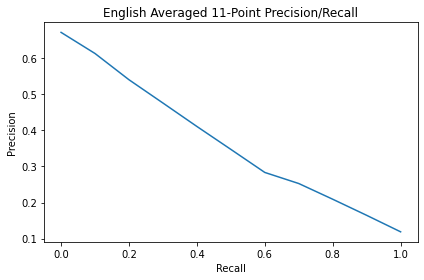

In [12]:
import matplotlib.pyplot as plt
plt.plot(x,values)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title("English Averaged 11-Point Precision/Recall")
plt.tight_layout()
plt.savefig('plot_run-1_en_precision_recall.jpg')

# Pivoted Document Length Normalization

In [1]:
from baseline import Baseline
from collections import Counter
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Czech
with open("run-1_cs_sw_l_index.bin", "rb") as f:
    index = json.load(f)
class Namespace:
    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)
args = Namespace(documents='documents_cs.lst', run='run-1_cs_sw_l', queries='topics-train_cs.xml',
                 output='run-1_train_cs_piv.res', stopwords=True, lemmas=True, lowercase=True, stemming=False, pivoted=False)
model = Baseline(args, index)

Processing queries


  0%|          | 0/25 [00:00<?, ?it/s]

['inflace', 'eura']


  4%|▍         | 1/25 [00:00<00:11,  2.18it/s]

['obnovitelný', 'zdroj']


  8%|▊         | 2/25 [00:01<00:12,  1.90it/s]

['role', 'policista']


 12%|█▏        | 3/25 [00:02<00:25,  1.17s/it]

['summit', 'nato', 'bezpečnostní', 'opatření']


 16%|█▌        | 4/25 [00:04<00:25,  1.22s/it]

['astma', 'dětství']


 20%|██        | 5/25 [00:04<00:17,  1.15it/s]

['animovaný', 'film']


 24%|██▍       | 6/25 [00:05<00:18,  1.04it/s]

['australský', 'premiér']


 28%|██▊       | 7/25 [00:06<00:16,  1.08it/s]

['klonování', 'člověk']


 32%|███▏      | 8/25 [00:12<00:40,  2.39s/it]

['automobilový', 'bombový', 'útok', 'bali']


 36%|███▌      | 9/25 [00:13<00:31,  1.99s/it]

['porušení', 'program', 'jaderný', 'zbraň', 'severní', 'korea']


 40%|████      | 10/25 [00:16<00:34,  2.28s/it]

['oskar', 'film']


 44%|████▍     | 11/25 [00:17<00:26,  1.90s/it]

['kniha', 'politik']


 48%|████▊     | 12/25 [00:18<00:22,  1.71s/it]

['snižování', 'riziko', 'onemocnění', 'cukrovka']


 52%|█████▏    | 13/25 [00:18<00:16,  1.37s/it]

['pivní', 'festival']


 56%|█████▌    | 14/25 [00:19<00:13,  1.20s/it]

['droga']


 60%|██████    | 15/25 [00:20<00:09,  1.07it/s]

['rukojmí', 'moskevský', 'divadlo']


 64%|██████▍   | 16/25 [00:21<00:09,  1.07s/it]

['únos', 'letadlo']


 68%|██████▊   | 17/25 [00:21<00:07,  1.13it/s]

['prohlášení', 'bülenta', 'ecevita']


 72%|███████▏  | 18/25 [00:22<00:05,  1.34it/s]

['úložiště', 'jaderný', 'odpad']


 76%|███████▌  | 19/25 [00:22<00:03,  1.52it/s]

['obezita', 'zdravotní', 'problém']


 80%|████████  | 20/25 [00:25<00:06,  1.32s/it]

['olympijský', 'medaile', 'sourozenec', 'kosteličový']


 84%|████████▍ | 21/25 [00:26<00:04,  1.17s/it]

['uzavírání', 'průmyslový', 'obchodní', 'podnik']


 88%|████████▊ | 22/25 [00:28<00:04,  1.34s/it]

['alternativa', 'očkování', 'chřipka']


 92%|█████████▏| 23/25 [00:28<00:02,  1.02s/it]

['rozvoj', 'internetový', 'bankovnictví']


 96%|█████████▌| 24/25 [00:29<00:01,  1.00s/it]

['ohrožený', 'druh']


100%|██████████| 25/25 [00:30<00:00,  1.21s/it]


In [ ]:
# English
with open("run-1_en_sw_s_index.bin", "rb") as f:
    index = json.load(f)
class Namespace:
    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)
args = Namespace(documents='documents_en.lst', run='run-1_en_sw_s', queries='topics-train_en.xml',
                 output='run-1_train_en_piv.res', stopwords=True, lemmas=False, lowercase=True, stemming=True, pivoted=None)
model = Baseline(args, index)

In [3]:
doc_dict = {doc[0]: list(Counter(doc[1]).values()) for doc in model.docs}

In [4]:
length = np.array([np.linalg.norm(counts) for counts in doc_dict.values()])

In [5]:
with open("qrels-train_cs.txt", "r") as f:
    relevant_docs = [line.strip().split() for line in f.readlines()]

In [6]:
relevant_docs = [[doc[0], doc[2]] for doc in relevant_docs]

In [25]:
with open("run-1_train_cs_piv0_9.res", "r") as f:
    retrieved_docs = [line.strip().split() for line in f.readlines()]

In [26]:
retrieved_docs = [[doc[0], doc[2]] for doc in retrieved_docs]

In [27]:
len(retrieved_docs), len(relevant_docs)

(25000, 10145)

In [28]:
sorted_docs = [(doc_name, len(terms)) for doc_name, terms in sorted(model.docs, key=lambda x: len(x[1]))]

In [29]:
doc_bins = []
for i in range(0, len(sorted_docs), 100):
    doc_bin = sorted_docs[i: i+100]
    doc_bins.append(doc_bin)

In [30]:
import math
medians = []
for doc_bin in doc_bins:
    if len(doc_bin) % 2 == 0: # even
        middle = doc_bin[int(len(doc_bin)/2-1):int(len(doc_bin)/2+1)]
    else:
        middle = [doc_bin[math.floor(len(doc_bin)/2)]]
    middle = [x[1] for x in middle]
    median = sum(middle) / float(len(middle))
    medians.append(median)

In [31]:
docs_in_bins = ([{doc[0] for doc in doc_bin} for doc_bin in doc_bins])

In [32]:
len(docs_in_bins)

818

In [33]:
relevant_bin_count = np.zeros(len(docs_in_bins))
for doc in relevant_docs:
    for i, doc_bin in enumerate(docs_in_bins):
        if doc[1] in doc_bin:
            relevant_bin_count[i] += 1

In [34]:
prob_relevant_bins = relevant_bin_count/sum(relevant_bin_count)

In [35]:
retrieved_bin_count = np.zeros(len(docs_in_bins))
for doc in retrieved_docs:
    for i, doc_bin in enumerate(docs_in_bins):
        if doc[1] in doc_bin:
            retrieved_bin_count[i] += 1

In [36]:
prob_retrieved_bins = retrieved_bin_count/sum(retrieved_bin_count)

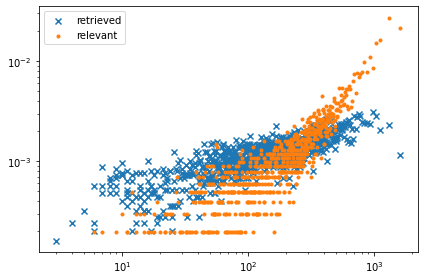

In [37]:
plt.scatter(medians, prob_retrieved_bins, marker='x', label="retrieved")
plt.scatter(medians, prob_relevant_bins, marker='.', label="relevant")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.tight_layout()

In [38]:
len(prob_retrieved_bins)

818

"We generated smooth plots for various figures by representing a
sequence of 24 bins by a single point and connecting these points by
a curve. The 742 bins yielded 31 different points where the last point
represented the longest 22 bins ( 742 = 30 x 24 + 1 x 22). The
representative point for a group of bins was obtained by taking averages 
of both the median lengths, and the probabilities of relevance/retrieval
for the 24 (22 for the last point) consecutive bins."

In [39]:
seq_bin_medians = []
seq_bin_probs_relevance = []
seq_bin_probs_retrieval = []
for i in range(0, len(doc_bins), 24):
    median = np.mean(medians[i:i+24])
    relevance =np.mean(prob_relevant_bins[i:i+24])
    retrieved =np.mean(prob_retrieved_bins[i:i+24])
    seq_bin_medians.append(median)
    seq_bin_probs_relevance.append(relevance)
    seq_bin_probs_retrieval.append(retrieved)

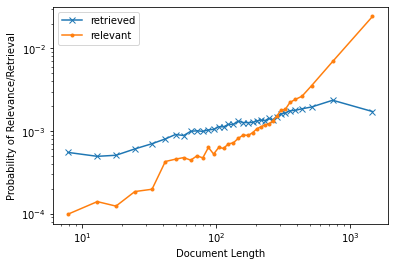

In [41]:
plt.plot(seq_bin_medians, seq_bin_probs_retrieval, marker='x', label="retrieved")
plt.plot(seq_bin_medians, seq_bin_probs_relevance, marker='.', label="relevant")
# work out crossover point
idx = np.argwhere(np.diff(np.sign(np.array(seq_bin_probs_retrieval) - np.array(seq_bin_probs_relevance)))).flatten()[0]
#plt.plot(seq_bin_medians[idx], seq_bin_probs_retrieval[idx], 'ro')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('Document Length')
plt.ylabel('Probability of Relevance/Retrieval')
plt.savefig('plot_cs_rel_ret_pivoted0_9.jpg')
#plt.tight_layout()

In [ ]:
seq_bin_medians[idx]

In [ ]:
median_docs = {doc[0] for doc in sorted_docs if doc[1] == int(seq_bin_medians[idx])}

In [ ]:
median_doc_dict = {doc[0]: list(Counter(doc[1]).values()) for doc in model.docs if doc[0] in median_docs}

In [ ]:
pivot_length = np.array([np.linalg.norm(counts) for counts in median_doc_dict.values()])

In [ ]:
np.mean(pivot_length)

In [ ]:
np.mean(length)